# CAPM - Capital Asset Pricing Model 

Portfolio Returns:

## $r_p(t) = \sum\limits_{i}^{n}w_i r_i(t)$

Market Weights:

## $ w_i = \frac{MarketCap_i}{\sum_{j}^{n}{MarketCap_j}} $


In [1]:
# Model CAPM as a simple linear regression

In [2]:
from scipy import stats

In [3]:
help(stats.linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None)
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.  If
        only `x` is given (and ``y=None``), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension.  In
        the case where ``y=None`` and `x` is a 2x2 array, ``linregress(x)`` is
        equivalent to ``linregress(x[0], x[1])``.
    
    Returns
    -------
    slope : float
        Slope of the regression line.
    intercept : float
        Intercept of the regression line.
    rvalue : float
        Correlation coefficient.
    pvalue : float
        Two-sided p-value for a hypothesis test whose null hypothesis is
        that the slope is zero, 

In [4]:
import pandas as pd

In [5]:
import pandas_datareader as web

In [6]:
start = pd.to_datetime('2010-01-04')
end = pd.to_datetime('2017-07-18')

In [7]:
spy_etf = web.DataReader('SPY','yahoo', start, end)

In [8]:
spy_etf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1898 entries, 2010-01-04 to 2017-07-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1898 non-null   float64
 1   Low        1898 non-null   float64
 2   Open       1898 non-null   float64
 3   Close      1898 non-null   float64
 4   Volume     1898 non-null   float64
 5   Adj Close  1898 non-null   float64
dtypes: float64(6)
memory usage: 103.8 KB


In [9]:
spy_etf.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,113.389999,111.510002,112.370003,113.330002,118944600.0,89.889221
2010-01-05,113.680000,112.849998,113.260002,113.629997,111579900.0,90.127174
2010-01-06,113.989998,113.430000,113.519997,113.709999,116074400.0,90.190620
2010-01-07,114.330002,113.180000,113.500000,114.190002,131091100.0,90.571312
2010-01-08,114.620003,113.660004,113.889999,114.570000,126402800.0,90.872726


In [10]:
aapl = web.DataReader('AAPL','yahoo',start,end)

In [11]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544686
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556002
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451719
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439792
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.482606


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

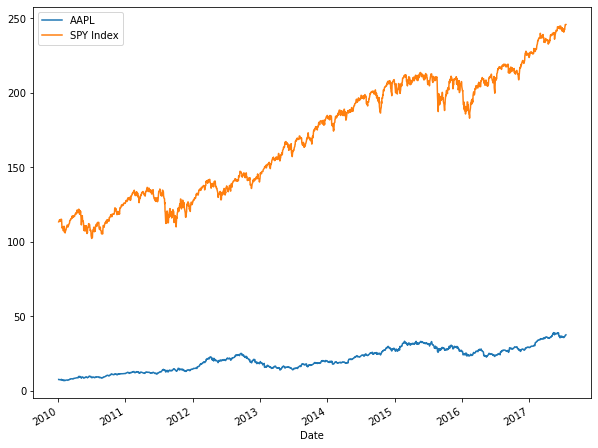

In [13]:
aapl['Close'].plot(label='AAPL',figsize=(10,8))
spy_etf['Close'].plot(label='SPY Index')
plt.legend()

## Compare Cumulative Return

In [14]:
aapl['Cumulative'] = aapl['Close']/aapl['Close'].iloc[0]
spy_etf['Cumulative'] = spy_etf['Close']/spy_etf['Close'].iloc[0]

Text(0.5, 1.0, 'Cumulative Return')

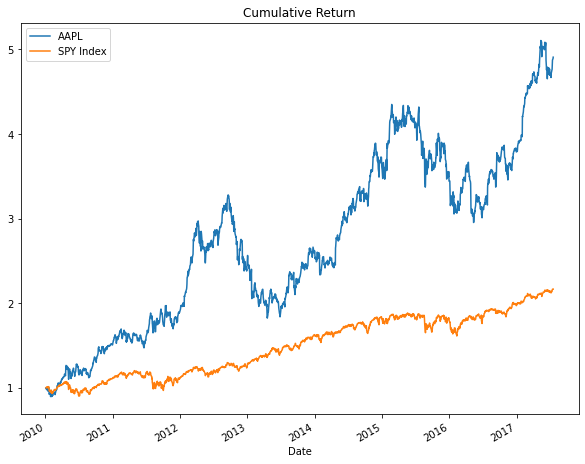

In [15]:
aapl['Cumulative'].plot(label='AAPL',figsize=(10,8))
spy_etf['Cumulative'].plot(label='SPY Index')
plt.legend()
plt.title('Cumulative Return')

## Get Daily Return

In [16]:
aapl['Daily Return'] = aapl['Close'].pct_change(1)
spy_etf['Daily Return'] = spy_etf['Close'].pct_change(1)

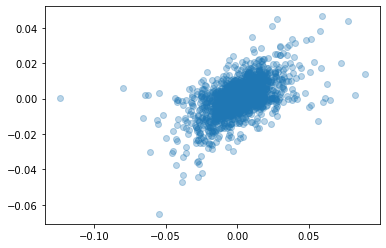

In [17]:
plt.scatter(aapl['Daily Return'],spy_etf['Daily Return'],alpha=0.3)

<AxesSubplot:>

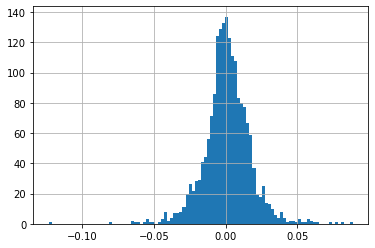

In [18]:
aapl['Daily Return'].hist(bins=100)

<AxesSubplot:>

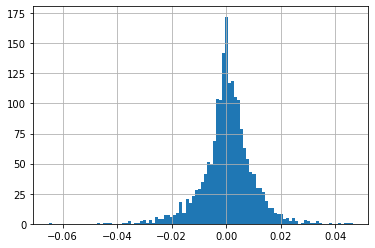

In [19]:
spy_etf['Daily Return'].hist(bins=100)

In [20]:
beta,alpha,r_value,p_value,std_err = stats.linregress(aapl['Daily Return'].iloc[1:],spy_etf['Daily Return'].iloc[1:])

In [21]:
beta

0.3257185128942015

In [22]:
alpha

0.00013699311134533315

In [23]:
r_value

0.5556582033773629

## What if our stock was completely related to SP500?

In [24]:
spy_etf['Daily Return'].head()


Date
2010-01-04         NaN
2010-01-05    0.002647
2010-01-06    0.000704
2010-01-07    0.004221
2010-01-08    0.003328
Name: Daily Return, dtype: float64

In [25]:
import numpy as np

In [26]:
noise = np.random.normal(0,0.001,len(spy_etf['Daily Return'].iloc[1:]))

In [27]:
noise

array([ 0.00034962, -0.00015669, -0.00033586, ...,  0.00040881,
        0.00076797, -0.00012517])

In [28]:
spy_etf['Daily Return'].iloc[1:] + noise

Date
2010-01-05    0.002997
2010-01-06    0.000547
2010-01-07    0.003885
2010-01-08    0.004198
2010-01-11   -0.000163
                ...   
2017-07-12    0.005689
2017-07-13    0.001111
2017-07-14    0.005073
2017-07-17    0.000646
2017-07-18    0.000404
Name: Daily Return, Length: 1897, dtype: float64

In [29]:
beta,alpha,r_value,p_value,std_err = stats.linregress(spy_etf['Daily Return'].iloc[1:]+noise,spy_etf['Daily Return'].iloc[1:])

In [30]:
beta

0.9899712826032685

In [31]:
alpha

-2.336104402366699e-05